May 28th: Modified it so it takes in the new pmf data. This is the latest version. 

In [1]:
import sys 
# IMPORTANT: please edit this as needed
#       this allows loading in the itx_reader from the folder below, 
sys.path.append('/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis') 
import itx_reader.main as itx 

import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

sns.set_style('white', rc={"xtick.bottom" : True, "ytick.left" : True})

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

matplotlib.rcParams['text.usetex'] = False

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
%pwd

'/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/plotting_code'

## _Loading in Data_
---------------------
*Loading in Time Series*

In [3]:
os.chdir('/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/')

In [4]:
ts_data = pd.read_feather('data_processing/processed_data/full_dataset.feather')

In [5]:
ts_data = ts_data.loc[:, ['acsm_utc_time', 'utc_6', 'Org', 'OA_f1', 'OA_f2', 'OA_f3', 'f1_stderr', 'f2_stderr', 'f3_stderr', 'f60_2wk', 'f44_2wk']]

In [6]:
ts_data.set_index('utc_6', inplace=True)

*Loading in Org Matrix Data*

In [7]:
org_mx_list = ['2011', '2012', '2013', '2015', '2016', '2017']

matrix_path = 'data_processing/processed_data/matrix_data/'
org_mx_list = map(lambda x: pd.read_feather(matrix_path + 'treated/' +
                                            x + '_Org_Mat.feather'), org_mx_list)
org_mx_list = list(org_mx_list)
org_mx = pd.concat(org_mx_list)
org_mx.set_index('utc_6', inplace=True)

mz_of_interest = org_mx[['60', '44']].copy()
mz_of_interest.rename({'60':'mz60', '44':'mz44'}, axis=1, inplace=True)

*Combing the datasets*

In [8]:
ts_data = ts_data.join(mz_of_interest)

In [9]:
ts_data['y_ste_lwr'] = ts_data['OA_f3'].add(-1*ts_data['f3_stderr'])
ts_data['y_ste_upr'] = ts_data['OA_f3'].add(ts_data['f3_stderr'])


ts_data.head()

,acsm_utc_time,Org,OA_f1,OA_f2,OA_f3,f1_stderr,f2_stderr,f3_stderr,f60_2wk,f44_2wk,mz60,mz44,y_ste_lwr,y_ste_upr
utc_6,,,,,,,,,,,,,,
2010-12-31 18:00:00,2011-01-01 00:00:00,0.105956,0.120943,0.023904,0.0,0.0,0.0,0.0,0.002687,0.242547,-0.002475,0.035782,0.0,0.0
2010-12-31 18:30:00,2011-01-01 00:30:00,0.060341,0.273907,0.044460,0.0,0.0,0.0,0.0,NaN,NaN,-0.003093,0.080039,0.0,0.0
2010-12-31 19:00:00,2011-01-01 01:00:00,0.376326,0.253169,0.012671,0.0,0.0,0.0,0.0,NaN,NaN,-0.001170,0.072946,0.0,0.0
2010-12-31 19:30:00,2011-01-01 01:30:00,0.172501,0.213207,0.107463,0.0,0.0,0.0,0.0,NaN,NaN,0.002716,0.065440,0.0,0.0
2010-12-31 20:00:00,2011-01-01 02:00:00,0.198224,0.043715,0.069093,0.0,0.0,0.0,0.0,NaN,NaN,-0.001123,0.010480,0.0,0.0


# First Plot: Jan-Feb 2012

In [10]:
# selecting a subset of the data based on date
date_start = '2010-12-31'
date_end = '2011-03-31'
subset = ts_data.loc[date_start:date_end].copy()

# This is a 'preview' of the data
subset

,acsm_utc_time,Org,OA_f1,OA_f2,OA_f3,f1_stderr,f2_stderr,f3_stderr,f60_2wk,f44_2wk,mz60,mz44,y_ste_lwr,y_ste_upr
utc_6,,,,,,,,,,,,,,
2010-12-31 18:00:00,2011-01-01 00:00:00,0.105956,0.120943,0.023904,0.000000,0.000000,0.000000,0.000000,0.002687,0.242547,-0.002475,0.035782,0.000000,0.000000
2010-12-31 18:30:00,2011-01-01 00:30:00,0.060341,0.273907,0.044460,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.003093,0.080039,0.000000,0.000000
2010-12-31 19:00:00,2011-01-01 01:00:00,0.376326,0.253169,0.012671,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.001170,0.072946,0.000000,0.000000
2010-12-31 19:30:00,2011-01-01 01:30:00,0.172501,0.213207,0.107463,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.002716,0.065440,0.000000,0.000000
2010-12-31 20:00:00,2011-01-01 02:00:00,0.198224,0.043715,0.069093,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.001123,0.010480,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-31 21:30:00,2011-04-01 03:30:00,0.397041,0.150006,0.297343,0.059556,0.041958,0.040565,0.006982,NaN,NaN,-0.001396,0.094478,0.052574,0.066537
2011-03-31 22:00:00,2011-04-01 04:00:00,0.682440,0.165712,0.265865,0.126002,0.027738,0.024452,0.010111,NaN,NaN,-0.000250,0.096474,0.115891,0.136112
2011-03-31 22:30:00,2011-04-01 04:30:00,NaN,0.234735,0.312066,0.239140,0.022344,0.020766,0.012043,NaN,NaN,NaN,NaN,0.227097,0.251182


In [11]:
# setting plot size 15 by 10
plt.rcParams["figure.figsize"] = (15, 10)
f60_threshold = 0.0028

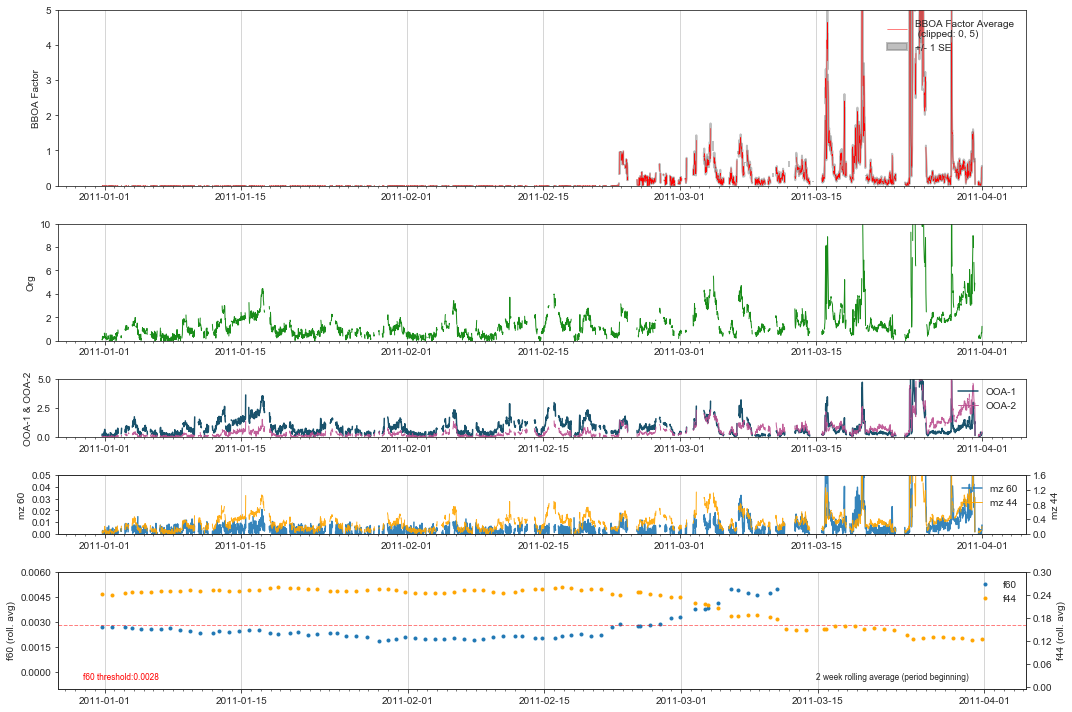

In [12]:
f1, ax = plt.subplots(5, 1, 
                      # adjusting the relative height
                                  gridspec_kw={'height_ratios': [3, 2, 1, 1, 2]})

# Adding Minor tick marks to all the x axis
for i in np.arange(0, 5):
    ax[i].xaxis.set_minor_locator(mdates.DayLocator())
    ax[i].yaxis.grid(False) # Hide the horizontal gridlines
    ax[i].xaxis.grid(True) # Show the vertical gridlines

# -------------------------------------------
### First Plot BBOA Solution Variability 
# plot the BBOA factor avg

# plot the BBOA factor standard error 
ax[0].fill_between(subset.index, 
                 subset['y_ste_lwr'],  subset['y_ste_upr'],
                 label='+/- 1 SE', 
                 color='gray', alpha=0.5, lw=2)

ax[0].set_ylim(0, 5)
ax[0].plot(subset['OA_f3'], label='BBOA Factor Average \n (clipped: 0, 5)', color='red', lw=0.5)

ax[0].set_ylabel('BBOA Factor')
ax[0].legend(frameon=False, loc='upper right')

# -------------------------------------------
### Second Plot: Org 

# if the max is too high, clip 
ax[1].set_ylim(0, 10)
ax[1].plot(subset['Org'], label='Org \n (clipped: 0, 10)', color='Green', alpha=0.9, lw=1)
ax[1].set_ylabel('Org')


# -------------------------------------------
### 3rd Plot: OOA-1 & OOA-2
ax[2].plot(subset['OA_f1'], label='OOA-1', color='#003f5c',  lw=1.5, alpha=0.9)
ax[2].plot(subset['OA_f2'], label='OOA-2', color='#bc5090', lw=1, alpha=0.9)
ax[2].set_ylabel('OOA-1 & OOA-2')
ax[2].set_ylim(0, 5)
ax[2].legend(frameon=False, loc='upper right')

# -------------------------------------------
### 4th Plot: mz60 & mz44 - Original Time Resolution 

mz60 = ax[3].plot(subset.mz60, label='mz 60', lw=1.5, alpha=0.9)
ax[3].set_ylabel('mz 60')
ax[3].set_ylim(0, 0.05)
ax[3].yaxis.set_major_locator(plt.MaxNLocator(5))

ax2b = ax[3].twinx() 

mz44 = ax2b.plot(subset.mz44, label='mz 44', color='orange', lw=1, alpha=0.9)
ax2b.set_ylabel('mz 44')
ax2b.set_ylim(0, 1.6)
ax2b.yaxis.set_major_locator(plt.MaxNLocator(5))

lns =  mz60 + mz44
labs = [l.get_label() for l in lns]
ax[3].legend(lns, labs, frameon=False, loc='upper right')

# -------------------------------------------
### 5th Plot: f44 & f60 - 2 week rolling 
# create another axis sharing the same x axis 
ax3b = ax[4].twinx() 

f60_line = ax[4].plot(subset.f60_2wk, '.', label='f60')
ax[4].set_ylabel('f60 (roll. avg)')
ax[4].set_ylim(-0.001, 0.006)

# horizontal line to show BBOA threshold 
ax[4].axhline(f60_threshold, ls='--', lw=1, alpha=0.5, color='red')
plt.figtext(0.15, 0.05, 'f60 threshold:' + str(f60_threshold), color='red',
            fontsize='small', horizontalalignment='right') 
ax[4].yaxis.set_major_locator(plt.MaxNLocator(6))


f44_line = ax3b.plot(subset.f44_2wk,'.', color='orange', label='f44')
ax3b.set_ylim(-0.005, 0.3)
ax3b.set_ylabel('f44 (roll. avg)')
ax3b.yaxis.set_major_locator(plt.MaxNLocator(6))


#Add the legend
lns =  f60_line+ f44_line 
labs = [l.get_label() for l in lns]
ax[4].legend(lns, labs, frameon=False, loc='upper right')

plt.figtext(0.9, 0.05, '2 week rolling average (period beginning)', 
            fontsize='small', horizontalalignment='right') 
plt.tight_layout()

#save_path = 'plotting_code/bboa_f60_f44_plot/test_results1.png'
#plt.savefig(save_path, layout='tight', format='png', pad_inches='0.1', dpi=300)
plt.show()

In [ ]:
?plt.legend